# Club Mahindra DataOlympics

### Food & Beverages Spend Prediction in Club Mahindra Resorts

#### Problem Statement
Club Mahindra (Club M) makes significant revenue from Food and Beverages (F&B) sales in their resorts. The members of Club M are offered a wide variety of items in either buffet or À la carte form. Following are some benefits that the model to predict the spend by a member in their next visit to a resort will bring:

1. Predicting the F&B spend of a member in a resort would help in improving the pre-sales during resort booking through web and mobile app
2. Targeted campaigns to suit the member taste and preference of F&B
3. Providing members in the resort with a customized experience and offers
4. Help resort kitchen to plan the inventory and food quantity to be prepared in advance

Given the information related to resort, club member, reservation etc. the task is to __predict average spend per room night on food and beverages for the each reservation__ in the test set.

#### Data Dictionary

| Variable | Description |
| -------- | ----------- |
| reservation_id | Reservation ID |
| booking_date	| Date of booking |
| checkin_date	| Checkin date recorded at the time of booking | 
| checkout_date	| Checkout date recorded at the time of booking |
| channel_code	| Different channels of booking |
| main_product_code	| Type of product a member has purchased |
| numberofadults	| Number of adults travelling |
| numberofchildren | Number of children travelling |
| persontravellingid	| Type of person travelling |
| resort_region_code	| Resort Region |
| resort_type_code	| Resort Type |
| room_type_booked_code	| Room Type |
| roomnights	| Number of roomnights booked |
| season_holidayed_code	| Season Holidayed |
| state_code_residence	| Residence State of Member |
| state_code_resort	| State in which resort is located |
| total_pax	| Total persons travelling |
| member_age_buckets	| Age bucket of the member |
| booking_type_code	| Type of Booking |
| memberid	| Unique ID of the member |
| cluster_code	| Cluster Code of Resort |
| reservationstatusid_code	| Reservation Status ID |
| resort_id	| Unique Resort ID |
| amount_spent_per_room_night_scaled	| (Target) Resort Spend Per Room Night |


#### Evaluation Metric
- RMSE * 100

#### Extra


- Maybe channel_code and main_product_code is related to what kind of membership a customer has.

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

In [2]:
from pathlib import Path

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
# set matplotlib ploting styles
sns.set()
sns.set_style('whitegrid')
sns.set_palette('muted')

In [5]:
c = sns.color_palette()
c_b = c[0]; c_o = c[1]; c_g = c[2]; c_r = c[3]; c_p = c[4]

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
DATA_DIR = "../input/"
SUB_DIR = "../submissions/"

In [8]:
train_df = pd.read_csv(Path(DATA_DIR)/'train.csv')
test_df = pd.read_csv(Path(DATA_DIR)/'test.csv')

In [9]:
def show_all_pandas(df, nrow=None, ncol=None):
    with pd.option_context('display.max_rows', nrow, 'display.max_columns', ncol):
        display(df)

## General info about data

In [10]:
show_all_pandas(train_df.head())

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [11]:
show_all_pandas(test_df.head())

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,3,4,1,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,1,4,8,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,2,2,3,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,1,2,3,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,2,3,8,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [12]:
print("Train shape : ", train_df.shape)

Train shape :  (341424, 24)


In [13]:
print("Test sahpe: ", test_df.shape)

Test sahpe:  (146765, 23)


In [14]:
# missing values info function
def missing_info(df):    
    x = df.isnull().sum()[(df.isnull().sum() > 0)]
    d = pd.DataFrame(x, columns=['missing values'])
    d['% of missing values'] = np.round((x/df.shape[0]) * 100, decimals=2)
    return d

In [15]:
# missing values in train set
missing_info(train_df)

,missing values,% of missing values
season_holidayed_code,114,0.03
state_code_residence,4764,1.40


In [16]:
# missing values in test set
missing_info(test_df)

,missing values,% of missing values
season_holidayed_code,35,0.02
state_code_residence,2260,1.54


In [17]:
# Statistics of train dataset
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
channel_code,341424.0,1.902810,0.915311,1.000000,1.00000,2.000000,3.000000,3.000000
main_product_code,341424.0,2.208738,0.823779,1.000000,2.00000,2.000000,3.000000,7.000000
numberofadults,341424.0,3.275361,1.756062,0.000000,2.00000,3.000000,4.000000,32.000000
numberofchildren,341424.0,0.362696,0.758019,0.000000,0.00000,0.000000,0.000000,13.000000
persontravellingid,341424.0,210.288905,865.735577,45.000000,45.00000,45.000000,45.000000,4995.000000
resort_region_code,341424.0,1.772960,0.750806,1.000000,1.00000,2.000000,2.000000,3.000000
resort_type_code,341424.0,2.193832,1.551451,0.000000,1.00000,2.000000,3.000000,7.000000
room_type_booked_code,341424.0,2.890321,0.804260,1.000000,2.00000,3.000000,3.000000,6.000000
roomnights,341424.0,3.738346,2.479054,-45.000000,2.00000,3.000000,4.000000,60.000000
season_holidayed_code,341310.0,2.673862,0.885650,1.000000,2.00000,3.000000,3.000000,4.000000


In [18]:
# Statistics of test dataset
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
channel_code,146765.0,1.902068,0.914653,1.0,1.0,2.0,3.0,3.0
main_product_code,146765.0,2.204483,0.817804,1.0,2.0,2.0,3.0,7.0
numberofadults,146765.0,3.275897,1.783842,0.0,2.0,3.0,4.0,32.0
numberofchildren,146765.0,0.362287,0.758218,0.0,0.0,0.0,0.0,10.0
persontravellingid,146765.0,209.179852,862.926844,45.0,45.0,45.0,45.0,4995.0
resort_region_code,146765.0,1.774101,0.753281,1.0,1.0,2.0,2.0,3.0
resort_type_code,146765.0,2.196675,1.544679,0.0,1.0,2.0,3.0,7.0
room_type_booked_code,146765.0,2.888754,0.804043,1.0,2.0,3.0,3.0,6.0
roomnights,146765.0,3.730372,2.482388,0.0,2.0,3.0,4.0,80.0
season_holidayed_code,146730.0,2.681088,0.882366,1.0,2.0,3.0,3.0,4.0


In [19]:
target_col_name = 'amount_spent_per_room_night_scaled'

## Univariate analysis

### Helper functions

In [20]:
def num_target_plots(trn_df, tst_df, col, target, freq_thres = 50):
    low_freq = False
    if trn_df[col].nunique() < freq_thres:
        low_freq = True
    
    if low_freq:
        fig, ax = plt.subplots(ncols=2, figsize=(15, 4))
        sns.countplot(trn_df[col], ax=ax[0], color=c_b)
        ax[0].set(title='distribution for train data')
        sns.countplot(tst_df[col], ax=ax[1], color=c_p)
        ax[1].set(title='distribution for test data')
    else:
        fig, ax = plt.subplots(ncols=2, figsize=(15, 4))
        sns.distplot(trn_df[col], ax=ax[0], color=c_b)
        ax[0].set(title='distribution for train data')
        sns.distplot(tst_df[col], ax=ax[1], color=c_p)
        ax[1].set(title='distribution for test data')
        
    fig, ax = plt.subplots(figsize=(15,4))
    sns.regplot(trn_df[col], trn_df[target], ax=ax)
    ax.set(title="Regression Plot")
    
    plt.tight_layout()
    plt.show()

In [21]:
def cat_target_plots(trn_df, tst_df, col, target):
    facet = sns.FacetGrid(trn_df, hue = col, size=4, aspect=3)
    facet.fig.suptitle((target + ' distribution' + ' by ' + col), fontsize=16, y=1.01)
    facet.map(sns.kdeplot, target, shade=True)
    facet.add_legend()
    
    fig, ax = plt.subplots(ncols=2, figsize=(15, 4))
    sns.countplot(trn_df[col], ax=ax[0], color=c_b)
    ax[0].set(title='counts for train data')
    sns.countplot(tst_df[col], ax=ax[1], color=c_p)
    ax[1].set(title='counts for test data')
    
    plt.tight_layout()
    plt.show()

In [22]:
def date_plots(trn_df, tst_df, col, target):
    fig, ax = plt.subplots(nrows=3, figsize=(15,15), sharex=True)

    sns.lineplot(trn_df[col], trn_df[target], ax=ax[0])
    ax[0].set(title=col + " vs " + target)

    x = trn_df[col].value_counts().sort_index()
    sns.lineplot(x.index, x.values, ax=ax[1])
    ax[1].set(title='train set', ylabel='count')

    x = tst_df[col].value_counts().sort_index()
    sns.lineplot(x.index, x.values, ax=ax[2])
    ax[2].set(title='test set', xlabel=col, ylabel='count')

    plt.tight_layout()
    plt.show()

### `amount_spent_per_room_night_scaled` - (Target) Resort Spend Per Room Night

data type - numerical

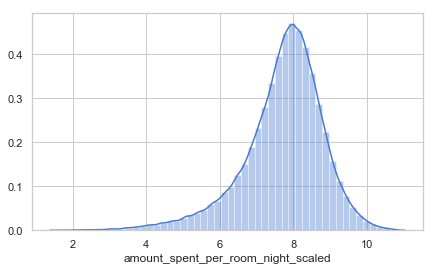

In [23]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.distplot(train_df[target_col_name], ax=ax)
plt.show()

- It's so good to be true that this distribution is almost normal.
- Maybe power transformation is applied, like log or box-cox.

In [24]:
train_df[target_col_name].describe()

count    341424.000000
mean          7.720801
std           1.090109
min           1.600397
25%           7.187260
50%           7.860814
75%           8.419144
max          10.816652
Name: amount_spent_per_room_night_scaled, dtype: float64

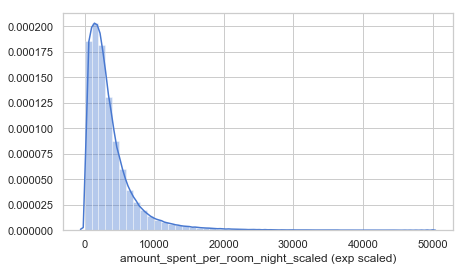

In [25]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.distplot(np.exp(train_df[target_col_name]), ax=ax)
ax.set(xlabel = target_col_name + ' (exp scaled)')
plt.show()

In [26]:
np.exp(train_df[target_col_name]).describe()

count    341424.000000
mean       3614.076948
std        3839.225399
min           4.955000
25%        1322.475000
50%        2593.630000
75%        4533.020417
max       49843.926876
Name: amount_spent_per_room_night_scaled, dtype: float64

### `reservation_id` - Reservation ID

data type - hashed value (unique column in this dataset)

In [27]:
print("Total unique reservation_id in train data: ", train_df['reservation_id'].nunique())
print("Total unique reservation_id in test data: ", test_df['reservation_id'].nunique())
print("number of new reservation_id in test data: ", len(set(train_df['reservation_id'].unique()).union(set(test_df['reservation_id']))) - test_df['reservation_id'].nunique())

Total unique reservation_id in train data:  341424
Total unique reservation_id in test data:  146765
number of new reservation_id in test data:  341424


### `booking_date` - Date of booking

data type - date

In [28]:
train_df['booking_date'] = pd.to_datetime(train_df['booking_date'], dayfirst=True, infer_datetime_format=True)
test_df['booking_date'] = pd.to_datetime(test_df['booking_date'], dayfirst=True, infer_datetime_format=True)

In [29]:
print("Starting booking date in train data: ", train_df['booking_date'].min())
print("Ending booking date in train data: ", train_df['booking_date'].max())
print("Starting booking date in test data: ", test_df['booking_date'].min())
print("Ending booking date in test data: ", test_df['booking_date'].max())

Starting booking date in train data:  2014-09-03 00:00:00
Ending booking date in train data:  2019-03-01 00:00:00
Starting booking date in test data:  2014-09-03 00:00:00
Ending booking date in test data:  2019-03-01 00:00:00


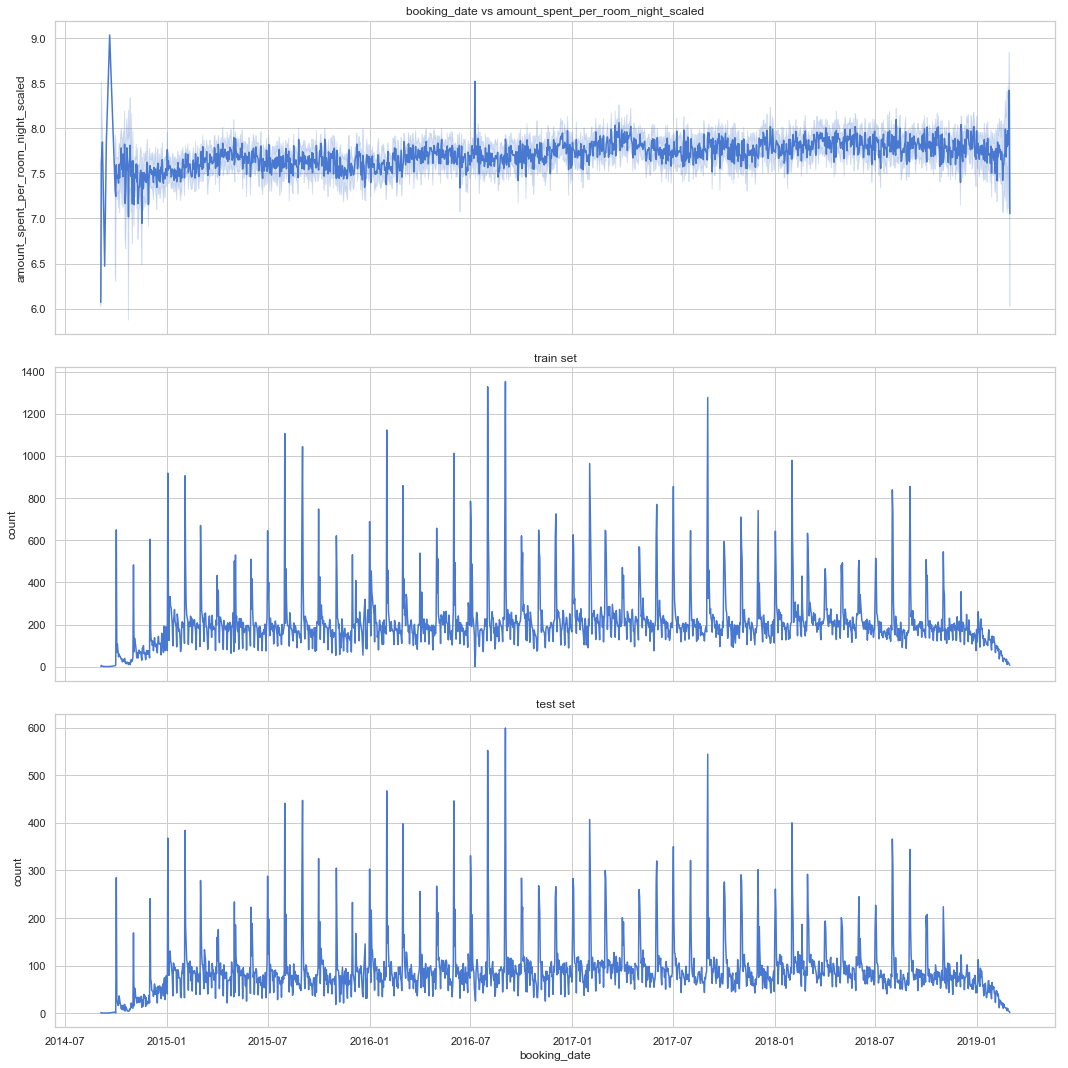

In [30]:
date_plots(train_df, test_df, 'booking_date', target_col_name)

### `checkin_date` - Checkin date recorded at the time of booking

data type - date

In [31]:
train_df['checkin_date'] = pd.to_datetime(train_df['checkin_date'], dayfirst=True, infer_datetime_format=True)
test_df['checkin_date'] = pd.to_datetime(test_df['checkin_date'], dayfirst=True, infer_datetime_format=True)

In [32]:
print("Starting checkin date in train data: ", train_df['checkin_date'].min())
print("Ending checkin date in train data: ", train_df['checkin_date'].max())
print("Starting checkin date in test data: ", test_df['checkin_date'].min())
print("Ending checkin date in test data: ", test_df['checkin_date'].max())

Starting checkin date in train data:  2012-03-08 00:00:00
Ending checkin date in train data:  2019-03-01 00:00:00
Starting checkin date in test data:  2012-04-20 00:00:00
Ending checkin date in test data:  2019-03-01 00:00:00


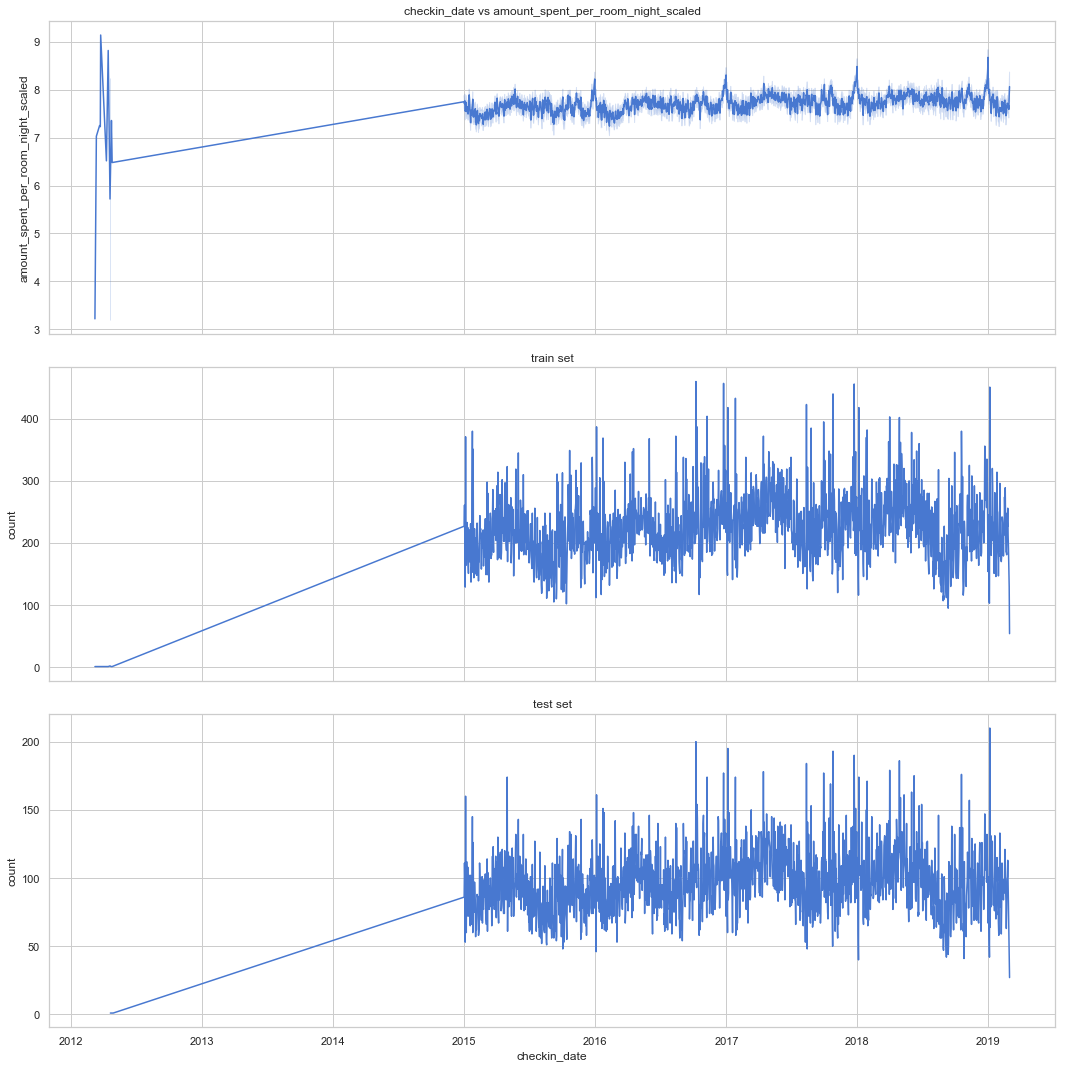

In [33]:
date_plots(train_df, test_df, 'checkin_date', target_col_name)

In [34]:
(train_df['checkin_date'].dt.year < 2015).sum()

12

In [35]:
(test_df['checkin_date'].dt.year < 2015).sum()

2

In [36]:
(train_df['booking_date'] > train_df['checkin_date']).sum()

12

In [37]:
(test_df['booking_date'] > test_df['checkin_date']).sum()

2

In [38]:
show_all_pandas(train_df[(train_df['booking_date'] > train_df['checkin_date'])])

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
15,821a5e5313029b1bbec6ec738a1b34d6d14c82fca97c47...,2018-04-05,2012-03-08,11/03/12,3,1,2,0,45,1,1,2,1,3.0,8.0,6,3,H,1,7b68caeb153ac83aeab0b9a679709c558d57a6c9d2bdf6...,F,C,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,3.218876
34,a80d2fbea1195021307a13a44642855c60f46145dcf29c...,2018-03-31,2012-03-12,18/03/12,3,2,3,0,45,1,1,3,2,2.0,5.0,1,3,D,2,d4eee99d5c3238cdda52479fb34125e15208d394af34e7...,E,C,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...,7.029715
60,51fe7242f55c79aacb499f957c746445ccb51de3c8d206...,2018-04-05,2012-03-24,25/03/12,3,2,2,0,45,3,3,3,1,2.0,6.0,3,4,I,1,a24896d1582d8b6c0de997d8b7435962e33580ba80839d...,A,C,f5ca38f748a1d6eaf726b8a42fb575c3c71f1864a81433...,9.142010
79,548605b68da37dd5c8555a37650910ce9f110e793b4619...,2018-04-05,2012-03-21,25/03/12,1,3,3,1,45,3,3,2,6,2.0,4.0,5,3,E,1,3bb1aa01c771c2217fe08bae162569a3177da7d09ae6be...,F,A,7902699be42c8a8e46fbbb4501726517e86b22c56a189f...,7.252902
81,3ac8796577c899cd0177b6f9638515e4feab55d8a72b8b...,2018-04-05,2012-03-23,26/03/12,1,3,4,0,45,1,1,3,4,2.0,2.0,1,3,E,1,fa856d4dde8f88ed2855a74e2468cedd802ee253434a6c...,E,C,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,7.229536
113,4d73a3304416c4bff78b47c6b307a07568d7286d946e3e...,2018-04-06,2012-04-09,11/04/12,1,2,3,1,45,1,2,2,4,3.0,1.0,11,6,D,1,c2eaeada5db1e75552e54382c408fe1c600679060b052c...,F,C,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...,6.516391
116,8e7c40db97f7088ea2249bb9da85b1cfce31c8b537dcfa...,2018-04-06,2012-04-14,15/04/12,1,3,4,0,45,1,2,2,2,3.0,1.0,11,4,G,1,48a9cdd22b472fe4aa225acd45acdbe246de12fade4a59...,F,C,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...,8.819591
129,085264337c2af42038a81b4ec4d9e278d9699e5662d404...,2018-04-06,2012-04-19,21/04/12,3,1,2,0,45,3,3,4,1,2.0,5.0,5,3,B,1,914d3756e6da218a071578d46a3a3c4fce3b773a1736cb...,F,C,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,8.246436
130,7294817a3becfb22650a6e4cf0dd7d2a3a1a3969e1e01d...,2018-04-06,2012-04-19,21/04/12,3,1,2,0,45,3,3,4,1,2.0,5.0,5,3,B,1,914d3756e6da218a071578d46a3a3c4fce3b773a1736cb...,F,C,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,3.193578
147,e36df886dd8222cad63291754719419d5ff50b44e525e0...,2018-04-06,2012-04-22,26/04/12,3,3,4,0,45,1,1,3,1,3.0,9.0,6,3,B,2,0beacf60d9f72cdfe3f4b8f1f439c605b9bc37ca3a3922...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,7.017013


train data has 12 records which has check in date in year 2012 and test has 2 recors. This looks like some kind of error in data.

### `checkout_date` - Checkout date recorded at the time of booking

data type - date

In [39]:
train_df['checkout_date'] = pd.to_datetime(train_df['checkout_date'], dayfirst=True, infer_datetime_format=True)
test_df['checkout_date'] = pd.to_datetime(test_df['checkout_date'], dayfirst=True, infer_datetime_format=True)

In [40]:
print("Starting checkout date in train data: ", train_df['checkout_date'].min())
print("Ending checkout date in train data: ", train_df['checkout_date'].max())
print("Starting checkout date in test data: ", test_df['checkout_date'].min())
print("Ending checkout date in test data: ", test_df['checkout_date'].max())

Starting checkout date in train data:  2012-03-11 00:00:00
Ending checkout date in train data:  2019-03-03 00:00:00
Starting checkout date in test data:  2012-04-24 00:00:00
Ending checkout date in test data:  2019-03-03 00:00:00


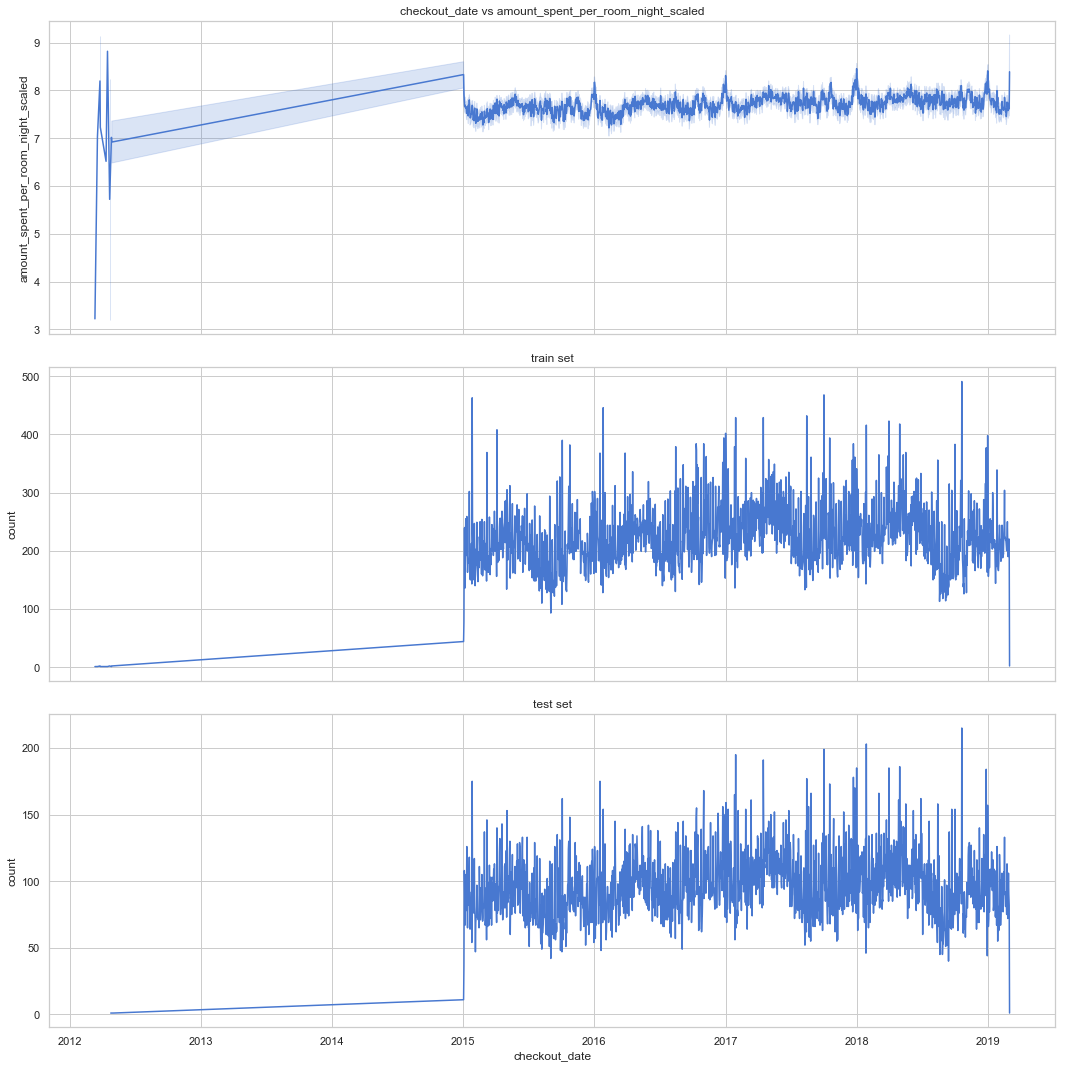

In [41]:
date_plots(train_df, test_df, 'checkout_date', target_col_name)

In [42]:
(train_df['booking_date'] > train_df['checkout_date']).sum()

12

In [43]:
(test_df['booking_date'] > test_df['checkout_date']).sum()

2

In [44]:
(train_df['checkin_date'] > train_df['checkout_date']).sum()

0

It has same situation as checkin date.

### `days_stay` - How many days a customer stayed (checkout_date - checkin_date)

- New created feature

data type - numeric

In [45]:
train_df['days_stay'] = (train_df['checkout_date'] - train_df['checkin_date']).dt.days
test_df['days_stay'] = (test_df['checkout_date'] - test_df['checkin_date']).dt.days

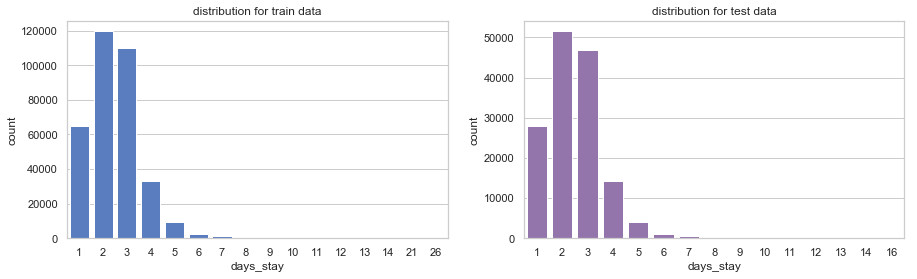

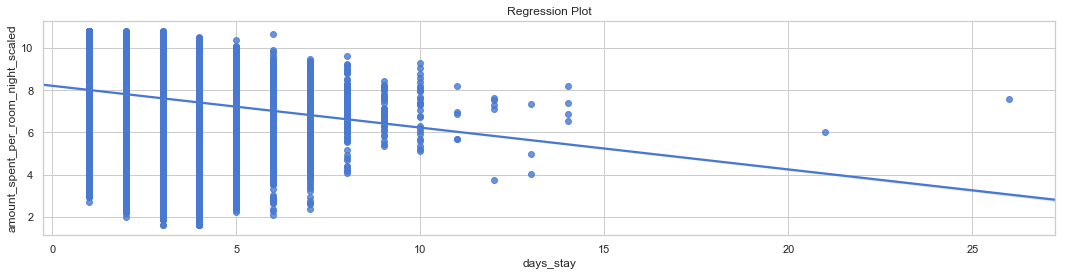

In [46]:
num_target_plots(train_df, test_df, 'days_stay', target_col_name)

###  `how_early_book` - how many days early a customer has booked the room
- new created feature

data type - numeric

In [47]:
((train_df['checkin_date'] - train_df['booking_date']).dt.days < 0).sum()

12

Let's clip -ve days to 0

In [48]:
train_df['how_early_book'] = np.clip((train_df['checkin_date'] - train_df['booking_date']).dt.days, a_min=0, a_max=1e+5).astype(int)
test_df['how_early_book'] = np.clip((test_df['checkin_date'] - test_df['booking_date']).dt.days, a_min=0, a_max=1e+5).astype(int)

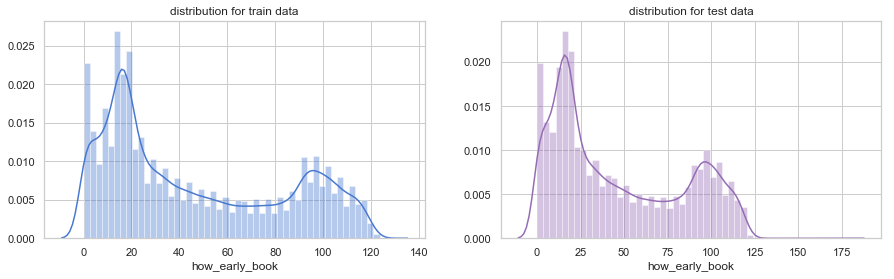

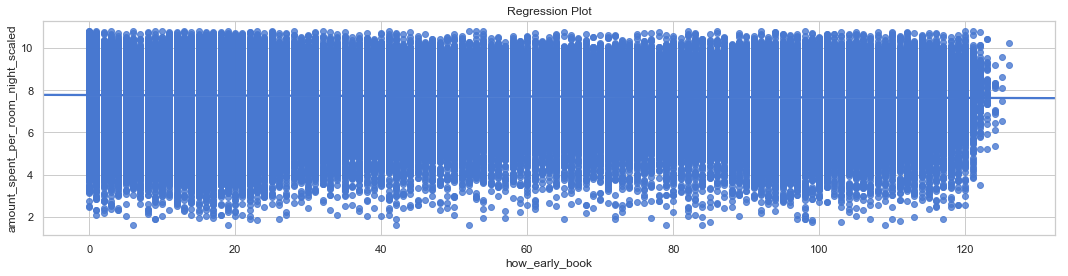

In [49]:
num_target_plots(train_df, test_df, 'how_early_book', target_col_name)

### `channel_code` - Different channels of booking

data type - categorical

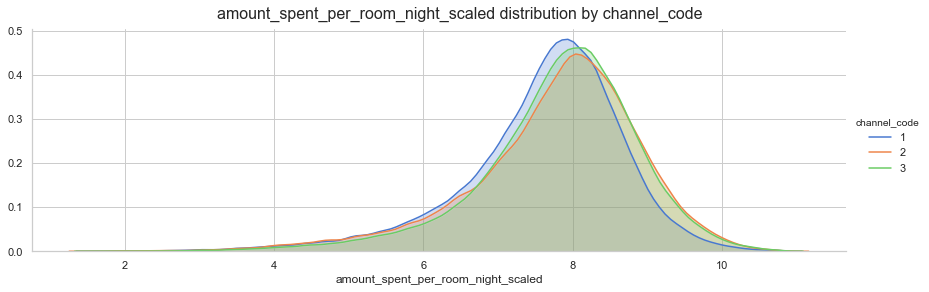

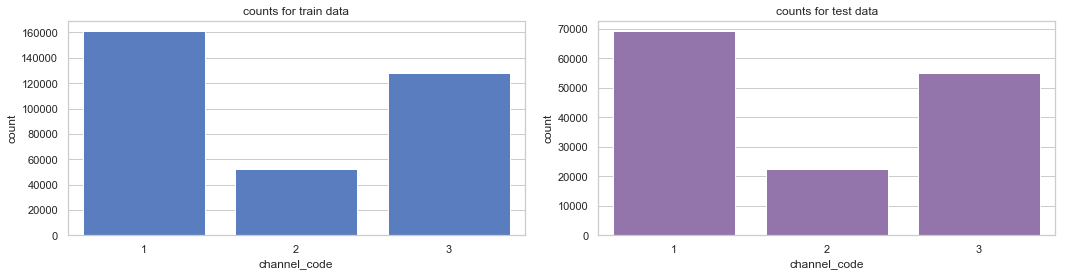

In [50]:
cat_target_plots(train_df, test_df, 'channel_code', target_col_name)

### `main_product_code` - Type of product a member has purchased

data type - categorical

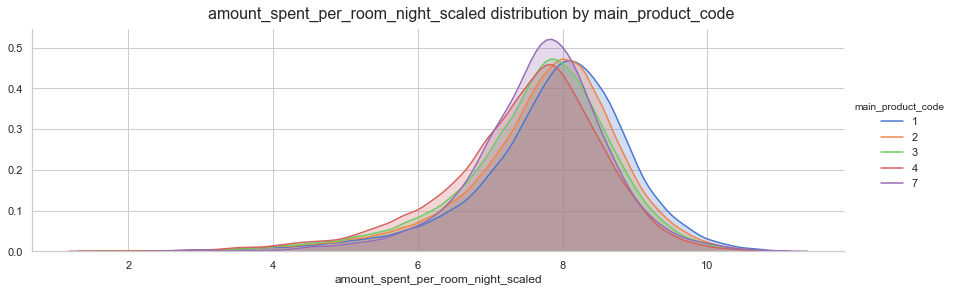

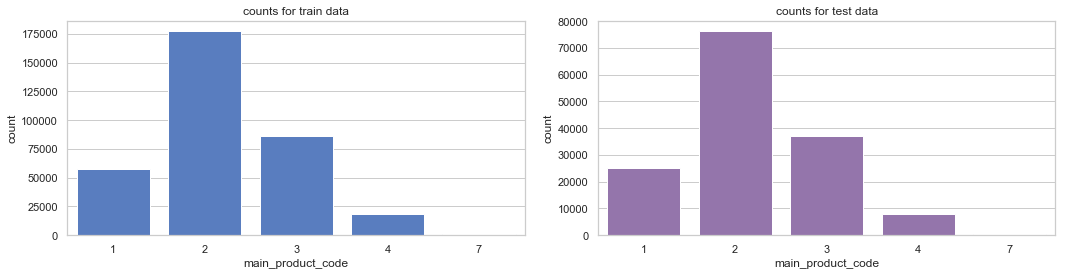

In [51]:
cat_target_plots(train_df, test_df, 'main_product_code', target_col_name)

### `numberofadults` - Number of adults travelling

data type - ordinal, numerical

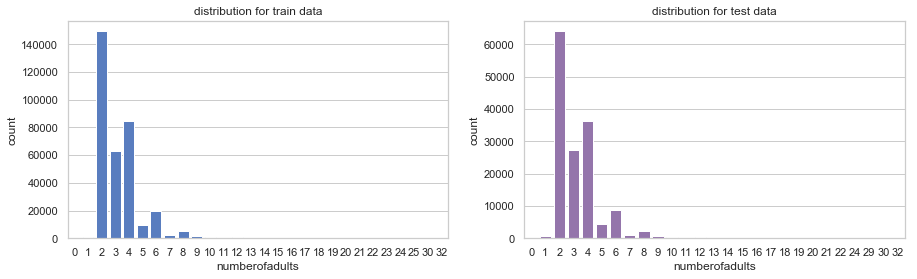

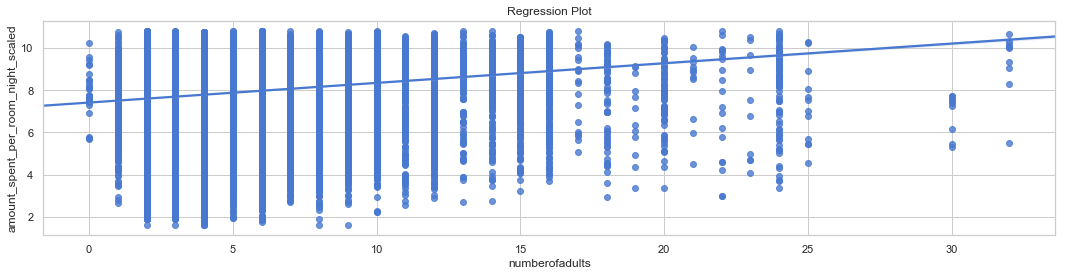

In [52]:
num_target_plots(train_df, test_df, 'numberofadults', target_col_name)

In [53]:
show_all_pandas(train_df[train_df['numberofadults'] == 0])

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,days_stay,how_early_book
5352,333c5d4cfaa6b4de0ace7ef86d7860a8352a88e84f0598...,2018-04-16,2018-04-29,2018-05-01,1,4,0,0,45,2,1,4,2,3.0,7.0,9,3,B,2,43cb3112dee1169770baa2c9f62ceba5fa5e6a55e4a4c8...,B,A,624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da5760...,7.634888,2,13
12566,c5f1fc78989e76654dc3d0f508f950f948a02de1ab2d8f...,2017-02-20,2017-04-07,2017-04-10,1,2,0,0,45,1,2,3,3,2.0,2.0,11,3,D,1,a8de6b83a58509ee8657313e950c1cb78ccb17e7e53622...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...,6.926593,3,46
36366,3d4f5480eb8b84c36016d8fb6cb257a265fe34b09243d1...,2017-04-14,2017-05-02,2017-05-05,1,3,0,0,45,1,5,4,3,2.0,1.0,1,4,H,1,60a88c5876c6f980caa21fdd41858dce2933d322ebb91c...,E,A,c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cb...,7.306455,3,18
52102,a7d27245f4c9ac5d77472e98f906df0d5c0d147612ee9a...,2017-02-01,2017-02-14,2017-02-16,1,3,0,0,45,1,1,3,2,4.0,NaN,6,2,E,1,2db45390f7f51fdc254b07b6ac63edb650074bb371c549...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,7.736130,2,13
68167,a7c0304322e8627a6e2331a3f047ec1bbd49489bd763f6...,2016-11-09,2016-11-10,2016-11-12,1,2,0,0,45,3,3,3,2,3.0,7.0,3,4,D,1,a0003ea11997e8335791ca584ce473273ae31e25acf514...,A,B,ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...,9.177836,2,1
78769,d26fbf2d5d87996c329c03df9147c44486266f02a579fd...,2017-12-11,2018-03-30,2018-04-01,1,2,0,0,45,1,1,3,2,3.0,2.0,6,4,C,2,8d33914e5f598a0ed972d1f55b791efc073aa204f017a1...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,8.770126,2,109
99340,f89ac59954203b38d97892766079d7f1f47efa157d4562...,2018-05-06,2018-05-29,2018-05-30,1,1,0,0,45,1,5,3,3,1.0,8.0,1,3,D,1,3d24aedf7a6a2940e4d114f5f58fbd38d57f717e2fad4c...,E,A,c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cb...,9.258593,1,23
109998,ae42a0a634cc334207e8865356ff775d0a2e86ae548c18...,2015-07-05,2015-08-10,2015-08-13,1,3,0,0,45,1,1,3,3,3.0,NaN,4,4,E,1,57cb22f2b6f3fcaaf17b91cb26dd151be0f76a64a5946c...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...,8.494436,3,36
155198,7ec5d0123bb26f70d77b235a2d166ed14ebb109c4b8637...,2017-12-05,2018-03-25,2018-03-27,1,2,0,0,45,1,1,3,3,3.0,7.0,1,4,D,1,ca9906a4844fdac818498b22f2ad1cd5579c13820269b9...,E,A,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,8.052255,2,110
161369,10c7f4ff787a25a7f66f540fa820cbbe90470854db8cec...,2018-08-01,2018-11-10,2018-11-12,1,1,0,0,45,1,1,2,2,2.0,8.0,6,6,C,2,ed9b24238493075b2a16a8e2cbb1a2342c299642514dc9...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,8.099849,2,101


Why some records has 0 number of adult and children? These records does't have 0 total_pax.

### `numberofchildren` - Number of children travelling

data type - ordinal, numerical

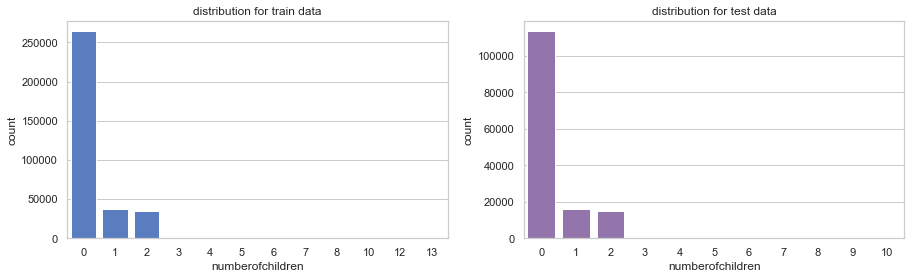

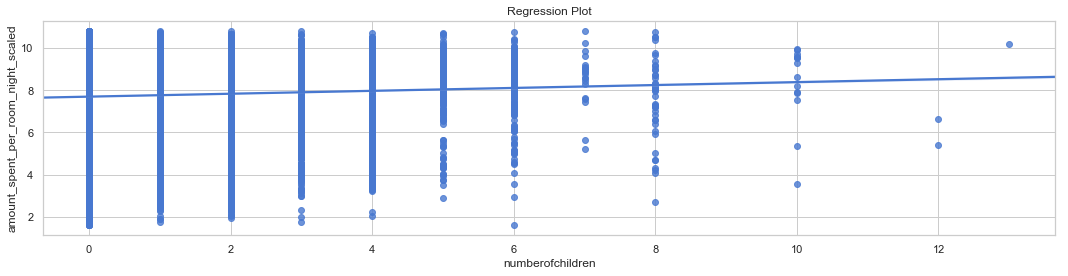

In [54]:
num_target_plots(train_df, test_df, 'numberofchildren', target_col_name)

### `total_people` - Total number of people traveling at registration time
- new created feature

data type - numeric

In [55]:
train_df['total_people'] = train_df['numberofadults'] + train_df['numberofchildren']
test_df['total_people'] = test_df['numberofadults'] + test_df['numberofchildren']

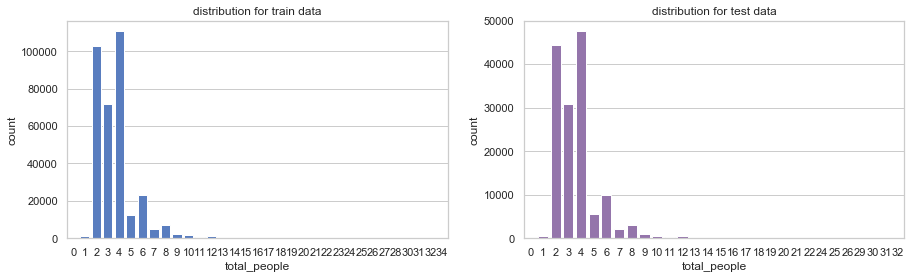

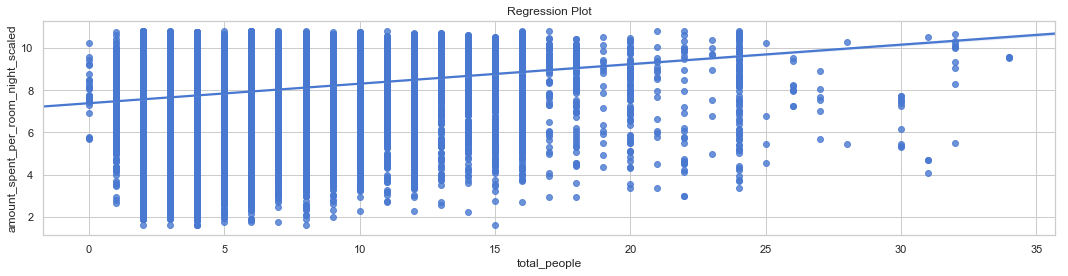

In [56]:
num_target_plots(train_df, test_df, 'total_people', target_col_name)

### `persontravellingid` - Type of person travelling

data type - categorical

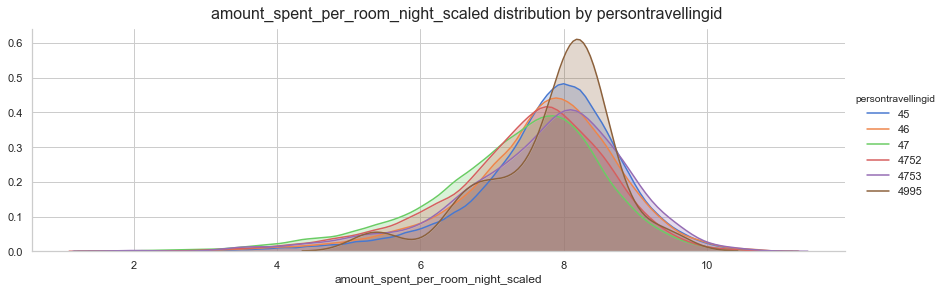

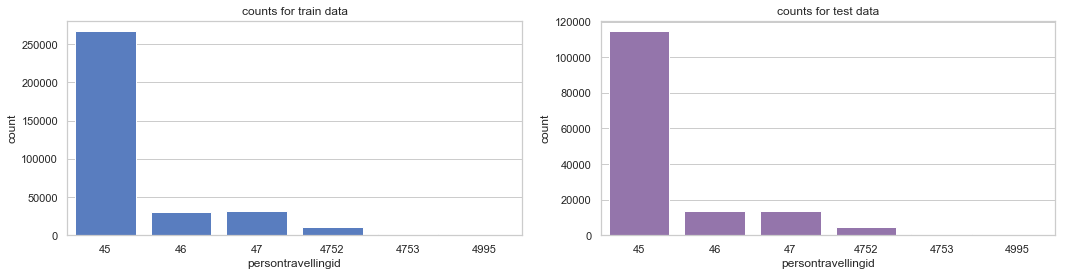

In [57]:
cat_target_plots(train_df, test_df, 'persontravellingid', target_col_name)

### `resort_region_code` - Resort Region

data type - categorical

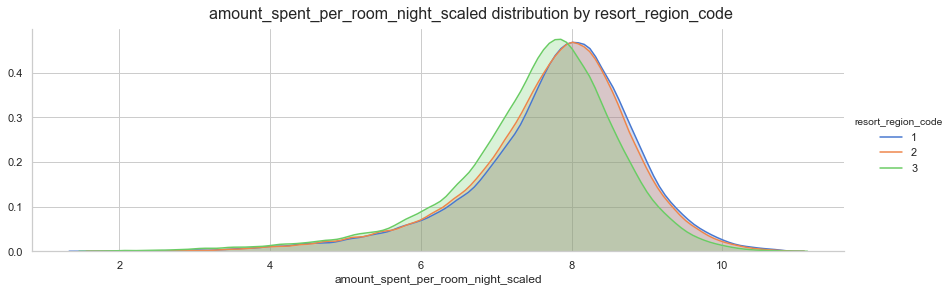

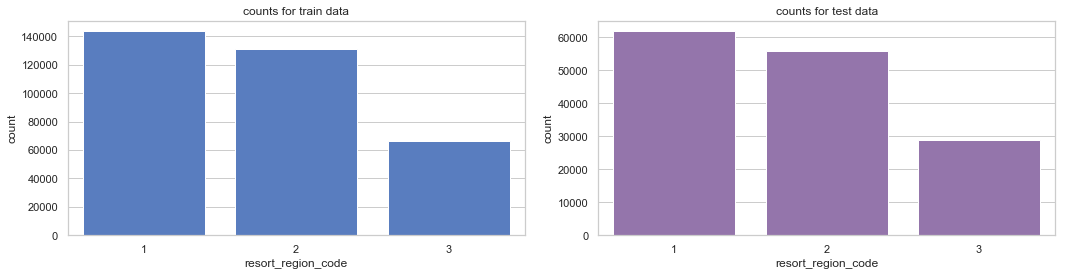

In [58]:
cat_target_plots(train_df, test_df, 'resort_region_code', target_col_name)

Based on http://www.clubmahindra.com/our-resorts/ , region code can be North, south, east, and west. But here we have only three types of region.


### `resort_type_code` - Resort Type

data type - categorical

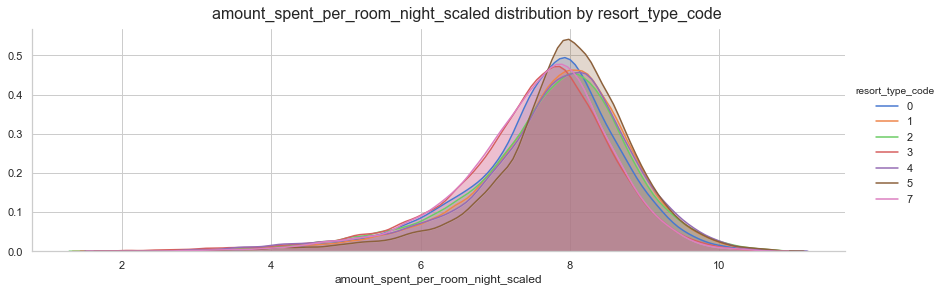

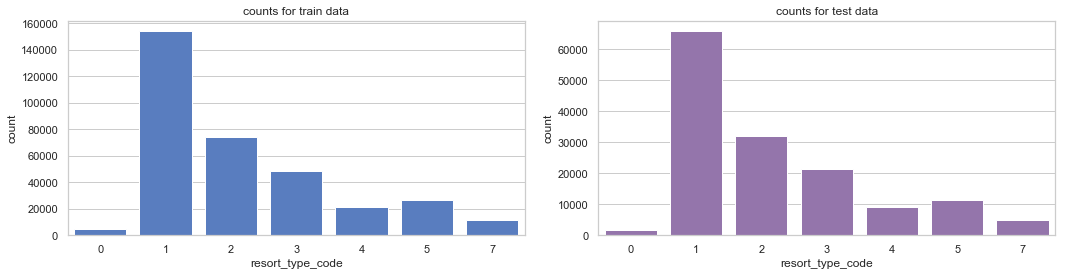

In [59]:
cat_target_plots(train_df, test_df, 'resort_type_code', target_col_name)

- based on http://www.clubmahindra.com/our-resorts/ , this can be Terrain type where this resort is located.

### `room_type_booked_code` - Room Type

data type - categorical

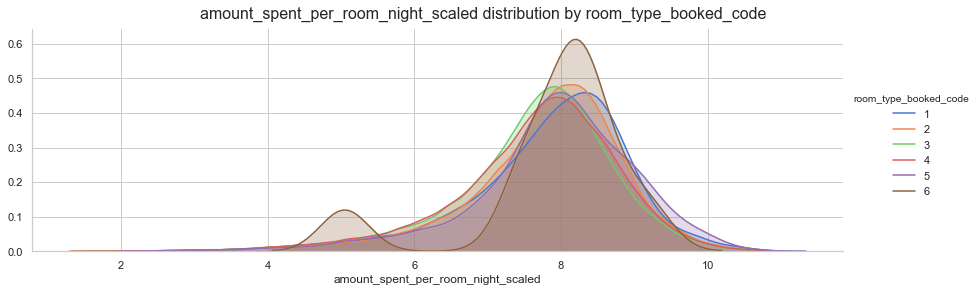

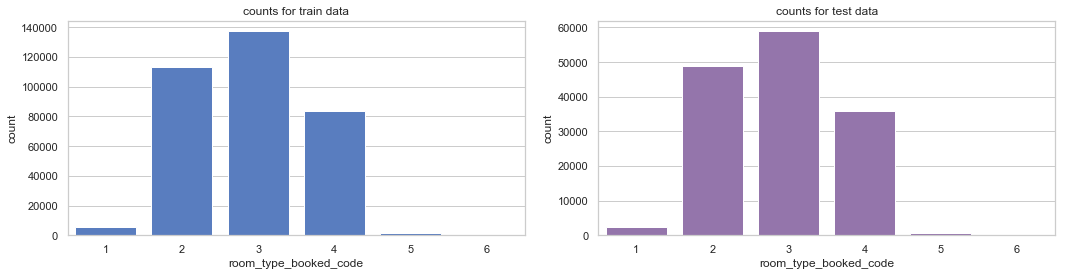

In [60]:
cat_target_plots(train_df, test_df, 'room_type_booked_code', target_col_name)

### `roomnights` - Number of roomnights booked

data type - ordinal, numeric

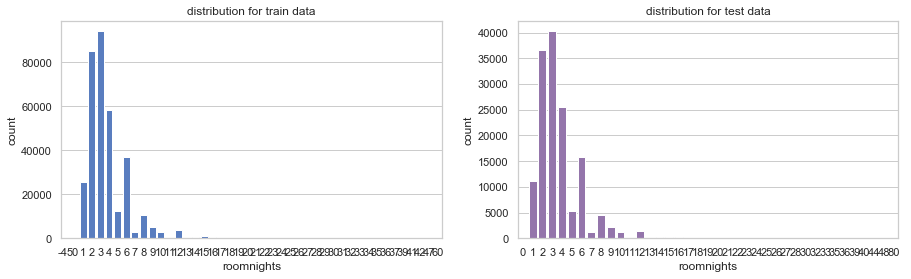

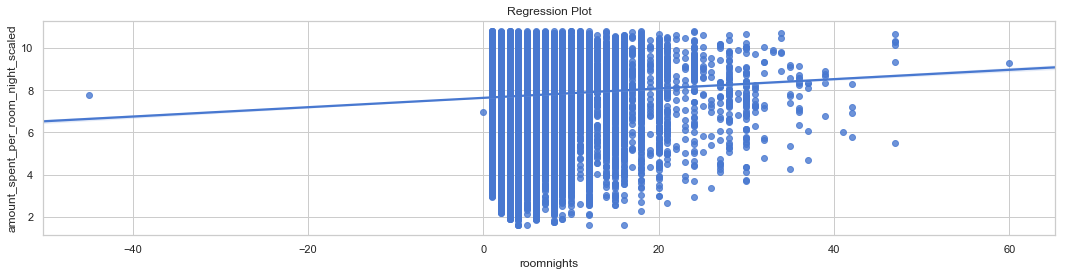

In [61]:
num_target_plots(train_df, test_df, 'roomnights', target_col_name)

In [62]:
train_df['roomnights'].describe()

count    341424.000000
mean          3.738346
std           2.479054
min         -45.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          60.000000
Name: roomnights, dtype: float64

In [63]:
test_df['roomnights'].describe()

count    146765.000000
mean          3.730372
std           2.482388
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          80.000000
Name: roomnights, dtype: float64

- In train set one value is -45 and one value is 0.
- In test data one value is 0.
- This can be an error in dataset

In [64]:
show_all_pandas(train_df[train_df['roomnights'] <= 0])

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,days_stay,how_early_book,total_people
36008,8cf7476b7111e0f969ef00d582f8a0833794239ebd3206...,2014-12-30,2015-03-22,2015-03-29,1,2,4,3,45,1,1,2,-45,3.0,8.0,6,4,D,1,a3af543aae775ab3cac3f789f74d5c0a70e6c0ecacb0db...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,7.779262,7,82,7
273025,667e201247617337e6ccdd4e03e522584162e8b13d0fb6...,2016-09-10,2016-09-24,2016-09-27,1,3,3,0,47,2,2,2,0,4.0,8.0,2,3,E,1,c7a740427b196812d17a725e969c87729d28c2b565d1c6...,D,A,6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef...,6.961135,3,14,3


In [114]:
# assume based on days_stay and total_people that roomnights is 14
train_df.loc[36008, 'roomnights'] = 14

# assume based on days_stay and total_people that roomnights is 3
train_df.loc[273025, 'roomnights'] = 3

In [115]:
show_all_pandas(test_df[test_df['roomnights'] <= 0])

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,days_stay,how_early_book,total_people,same_state_travel,rooms,person_per_room


In [116]:
# assume based on days_stay and total_people that roomnights is 3
test_df.loc[83523, 'roomnights'] = 3

In [103]:
show_all_pandas(train_df[(train_df['total_pax'] > 8)][['checkin_date', 'checkout_date', 'numberofadults', 'numberofchildren', 'total_people', 'total_pax', 'days_stay', 'roomnights', 'room_type_booked_code']].head(5))

,checkin_date,checkout_date,numberofadults,numberofchildren,total_people,total_pax,days_stay,roomnights,room_type_booked_code
320,2015-01-02,2015-01-04,4,0,4,9,2,5,1
1014,2015-01-11,2015-01-14,4,2,6,10,3,3,1
1978,2015-01-29,2015-02-01,6,0,6,9,3,3,1
2770,2016-11-08,2016-11-12,4,0,4,9,4,4,2
3334,2018-03-11,2018-03-15,4,0,4,10,4,4,1


In [104]:
(train_df['roomnights'] < train_df['days_stay']).sum()

97

### `rooms` - Total rooms booked (not exact)
- new created feature

data type - numeric

In [120]:
train_df['rooms'] = train_df['roomnights'] / train_df['days_stay']
test_df['rooms'] = test_df['roomnights'] / test_df['days_stay']

In [121]:
train_df['rooms'].describe()

count    341424.000000
mean          1.648749
std           1.220379
min           0.153846
25%           1.000000
50%           1.000000
75%           2.000000
max          47.000000
Name: rooms, dtype: float64

In [122]:
test_df['rooms'].describe()

count    146765.000000
mean          1.645403
std           1.177506
min           0.333333
25%           1.000000
50%           1.000000
75%           2.000000
max          40.000000
Name: rooms, dtype: float64

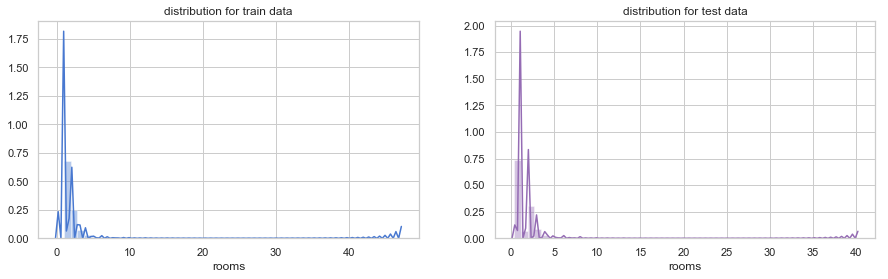

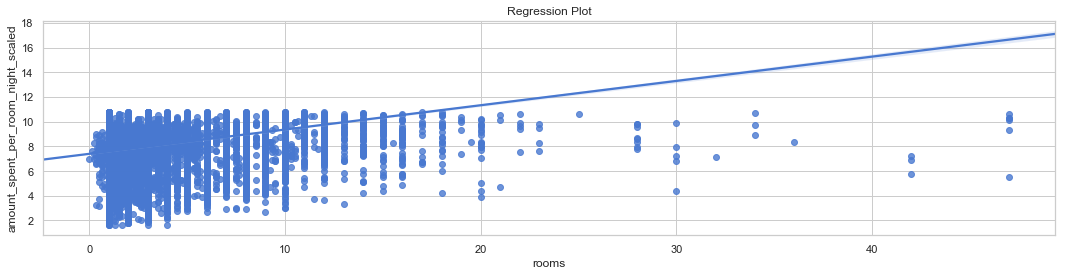

In [109]:
num_target_plots(train_df, test_df, 'rooms', target_col_name)

### `person_per_room` - average person per room (not exact)
- new created feature

data type - numeric

In [123]:
train_df['person_per_room'] = train_df['total_pax'] / train_df['rooms']
test_df['person_per_room'] = test_df['total_pax'] / test_df['rooms']

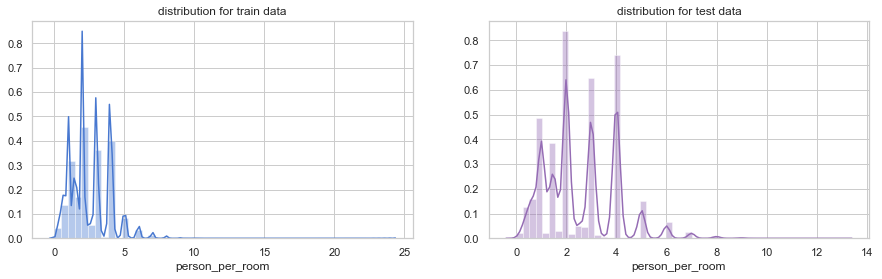

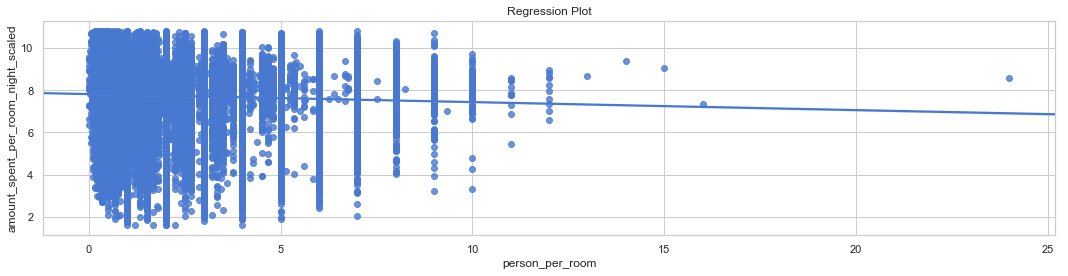

In [124]:
num_target_plots(train_df, test_df, 'person_per_room', target_col_name)

In [125]:
train_df['person_per_room'].describe()

count    341424.000000
mean          2.519503
std           1.401594
min           0.000000
25%           1.500000
50%           2.000000
75%           4.000000
max          24.000000
Name: person_per_room, dtype: float64

In [126]:
test_df['person_per_room'].describe()

count    146765.000000
mean          2.516109
std           1.399311
min           0.000000
25%           1.500000
50%           2.000000
75%           4.000000
max          13.000000
Name: person_per_room, dtype: float64

### `season_holidayed_code` - Season Holidayed

data type - categorical

In [66]:
train_df[train_df['season_holidayed_code'].isnull()]['resort_id'].unique()

array(['49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8',
       '9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767',
       '4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a'],
      dtype=object)

In [67]:
test_df[test_df['season_holidayed_code'].isnull()]['resort_id'].unique()

array(['49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8',
       '4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a'],
      dtype=object)

- We can see that season_holidayed_code is missing only for 2-3 resorts in year 2016 and 5th month for almost all records.
- we can fill missing values for season_holidayed_code by month in 2016 and resort wise.

In [68]:
# fill misdsing values for train set
for i, r in train_df[train_df['season_holidayed_code'].isnull()].iterrows():
    train_df.loc[i, 'season_holidayed_code'] = train_df[(train_df['resort_id'] == r['resort_id']) & (train_df['checkin_date'].dt.year == 2016) & (train_df['checkin_date'].dt.month == r['checkin_date'].month)]['season_holidayed_code'].mode().values[0]

In [69]:
# fill misdsing values for test set
for i, r in test_df[test_df['season_holidayed_code'].isnull()].iterrows():
    test_df.loc[i, 'season_holidayed_code'] = test_df[(test_df['resort_id'] == r['resort_id']) & (test_df['checkin_date'].dt.year == 2016) & (test_df['checkin_date'].dt.month == r['checkin_date'].month)]['season_holidayed_code'].mode().values[0]

In [70]:
train_df['season_holidayed_code'].isnull().sum()

0

In [71]:
test_df['season_holidayed_code'].isnull().sum()

0

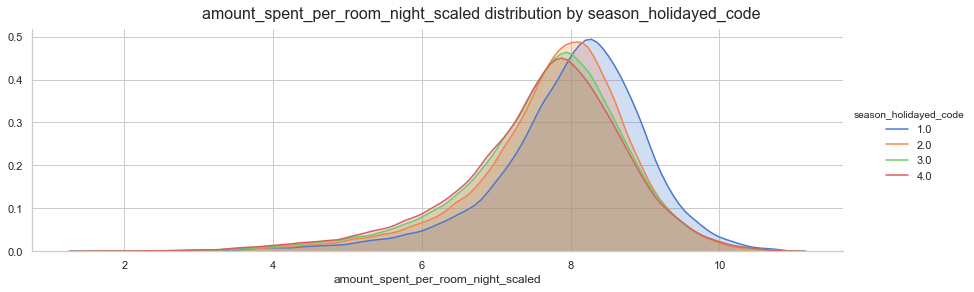

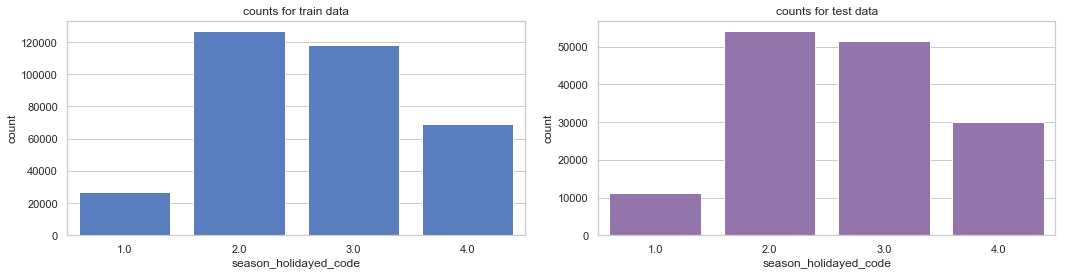

In [72]:
cat_target_plots(train_df, test_df, 'season_holidayed_code', target_col_name)

- As per http://www.clubmahindra.com/membership/overview, there are 4 types of seasons, purple, red, white, and blue. season_holidayed_code column also has 4 unique values.
- Membership plans are also decided based on these seasons.

In [73]:
train_df[train_df['checkin_date'].dt.year == 2017].groupby(['season_holidayed_code'])['checkin_date'].describe()

,count,unique,top,freq,first,last
season_holidayed_code,,,,,,
1.0,7816,133,2017-12-27 00:00:00,278,2017-01-01 00:00:00,2017-12-31 00:00:00
2.0,32161,355,2017-10-25 00:00:00,389,2017-01-01 00:00:00,2017-12-31 00:00:00
3.0,30400,358,2017-12-17 00:00:00,268,2017-01-01 00:00:00,2017-12-26 00:00:00
4.0,17464,276,2017-07-16 00:00:00,258,2017-01-19 00:00:00,2017-12-11 00:00:00


- We can't make any distinction based on date for this variable.
- Maybe this simply just suggest membership plan?

### `state_code_residence` - Residence State of Member

data type - categorical, geographical data

In [74]:
print(test_df['state_code_residence'].nunique(), ' unique residency states')

37  unique residency states


- India has 29 states. There are also 7 union territories. So, total is 36.
- our data has one state extra. 
- Maybe one extra state code can indicate that customer is not from india.
- We have 4764 missing values in train data set. around 1.5 % records in train and test set has missing values.

In [93]:
# fill missing values as 0
train_df['state_code_residence'] = train_df['state_code_residence'].fillna(0)
test_df['state_code_residence'] = test_df['state_code_residence'].fillna(0)

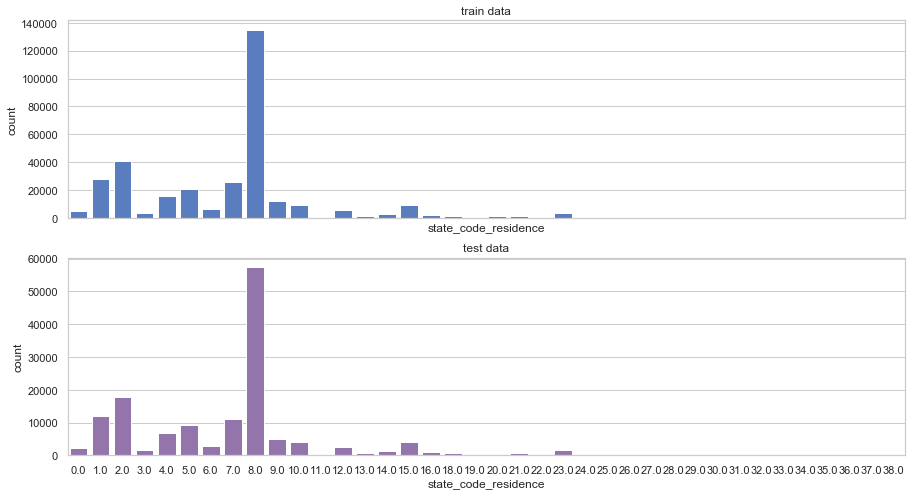

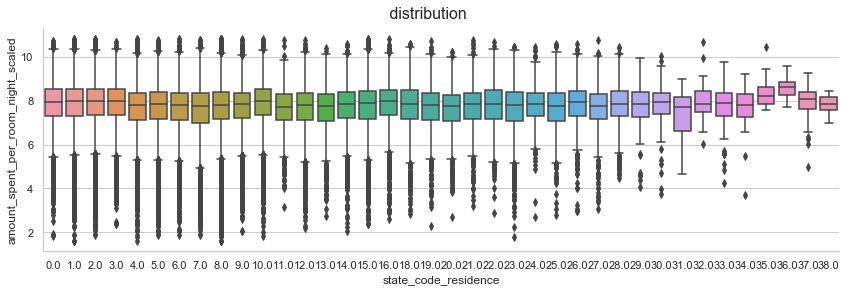

In [94]:
fig, ax = plt.subplots(nrows=2, figsize=(15,8), sharex=True)
sns.countplot(train_df['state_code_residence'], ax=ax[0], color=c_b)
ax[0].set(title='train data')

sns.countplot(test_df['state_code_residence'], ax=ax[1], color=c_p)
ax[1].set(title='test data')

facet = sns.catplot(y=target_col_name, x="state_code_residence", kind="box", data=train_df,  height=4, aspect=3)
facet.fig.suptitle(' distribution', fontsize=16, y=1.01)

plt.tight_layout()
plt.show()

### `state_code_resort` - State in which resort is located

data type - categorical, geographical data

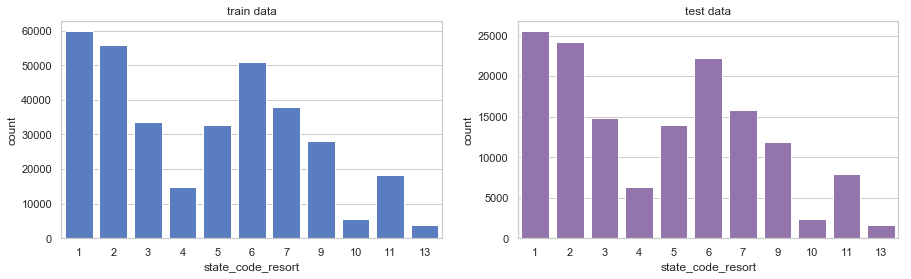

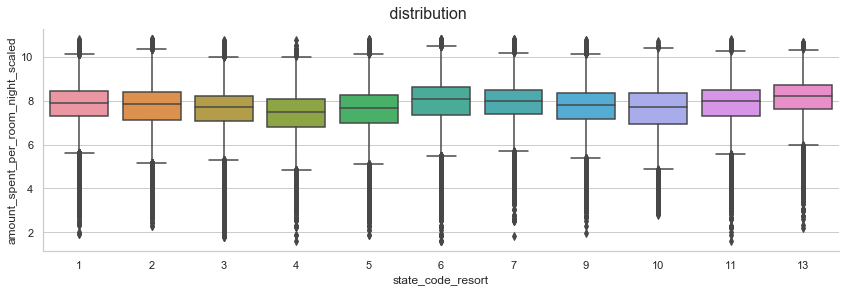

In [76]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4), sharex=True)
sns.countplot(train_df['state_code_resort'], ax=ax[0], color=c_b)
ax[0].set(title='train data')

sns.countplot(test_df['state_code_resort'], ax=ax[1], color=c_p)
ax[1].set(title='test data')

facet = sns.catplot(y=target_col_name, x="state_code_resort", kind="box", data=train_df,  height=4, aspect=3)
facet.fig.suptitle(' distribution', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

### `same_state_travel` - customer who is traveling in same state
- new created feature 

data type - binary

In [95]:
train_df['same_state_travel'] = (train_df['state_code_residence'] == train_df['state_code_resort']).astype(int)
test_df['same_state_travel'] = (test_df['state_code_residence'] == test_df['state_code_resort']).astype(int)

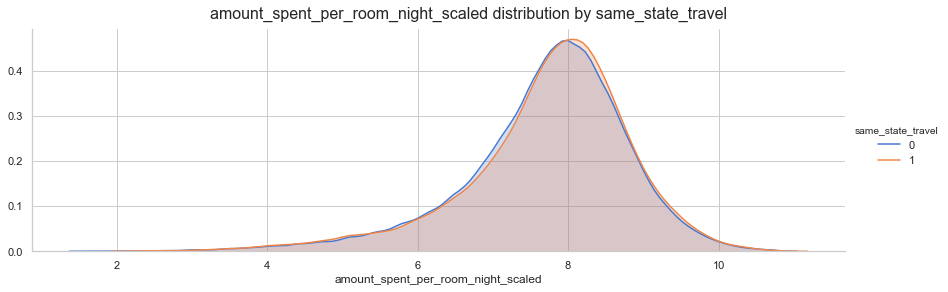

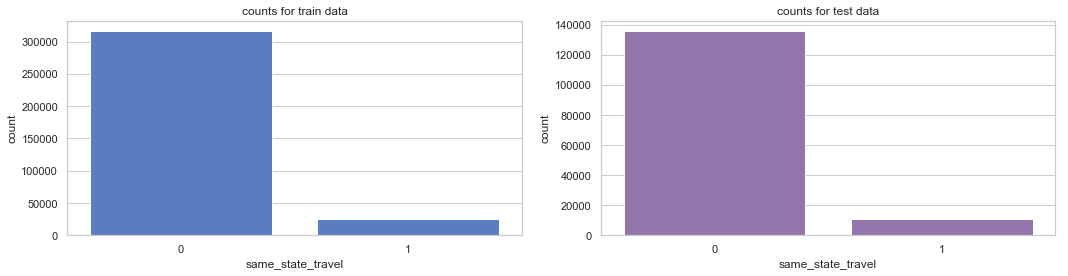

In [96]:
cat_target_plots(train_df, test_df, 'same_state_travel', target_col_name)

### `total_pax` - Total persons travelling

data type - ordinal, numerical

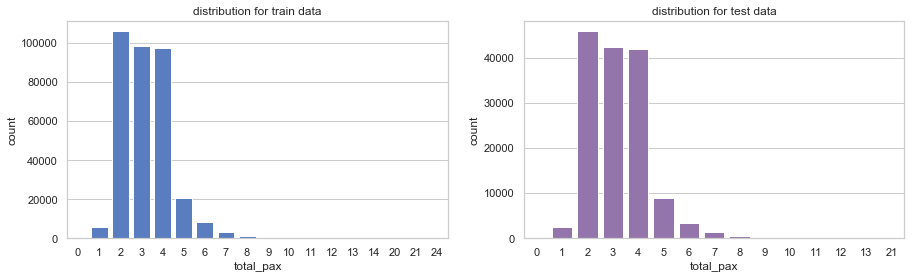

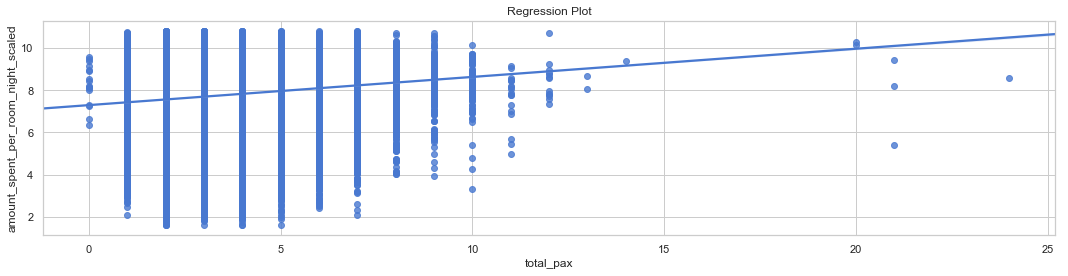

In [79]:
num_target_plots(train_df, test_df, 'total_pax', target_col_name)

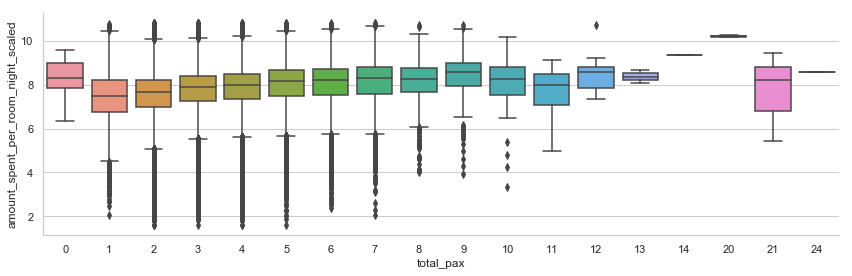

In [80]:
facet = sns.catplot(y=target_col_name, x="total_pax", kind="box", data=train_df,  height=4, aspect=3)

### `diff_pax_total` - Difference of pax and total people
- new feature

data type - numeric

In [134]:
train_df['diff_pax_total'] = train_df['total_pax'] - train_df['total_people']
test_df['diff_pax_total'] = test_df['total_pax'] - test_df['total_people']

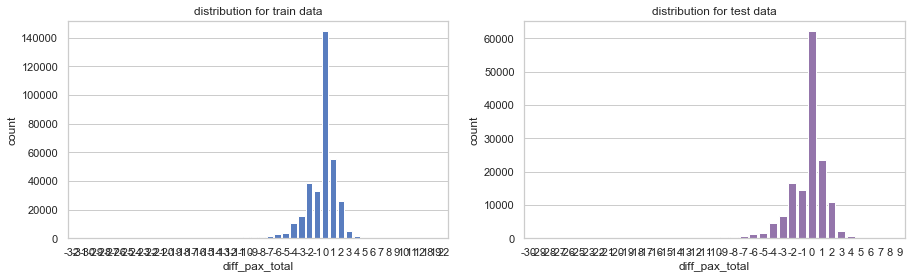

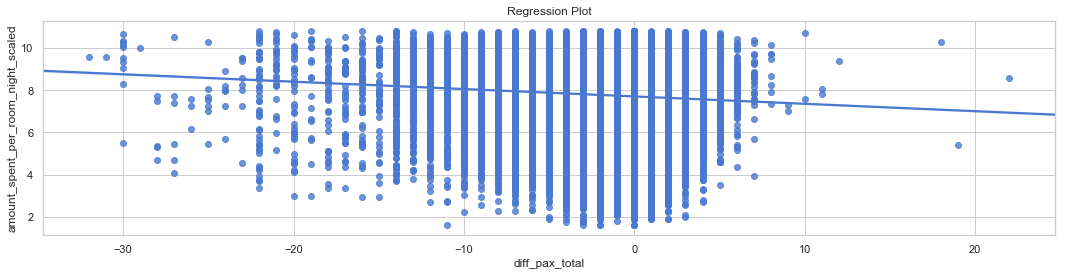

In [135]:
num_target_plots(train_df, test_df, 'diff_pax_total', target_col_name)

### `member_age_buckets` - Age bucket of the member

data type - age (binned)

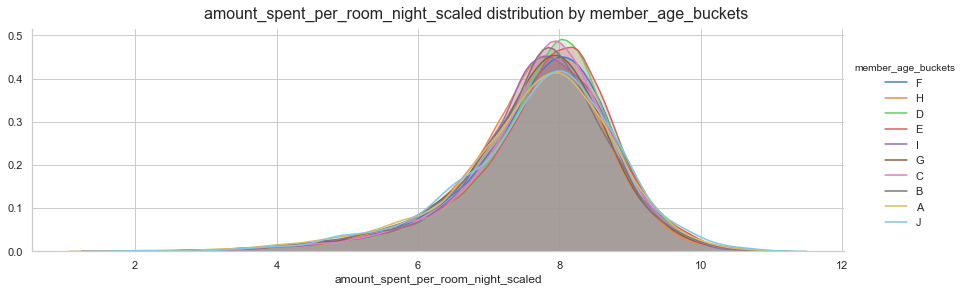

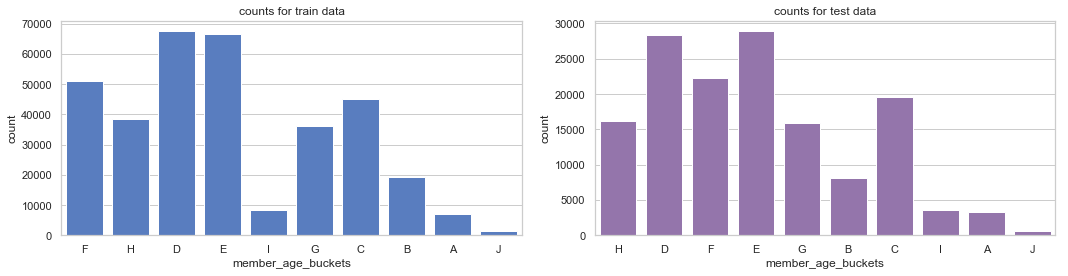

In [81]:
cat_target_plots(train_df, test_df, 'member_age_buckets', target_col_name)

We can use this variable as a orinal variable, where 'A' has lowest bucket value and 'J' has highest.

### `booking_type_code` - Type of Booking

data type - categorical

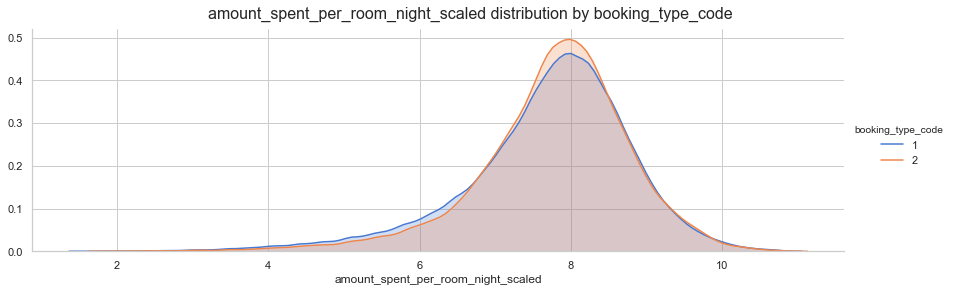

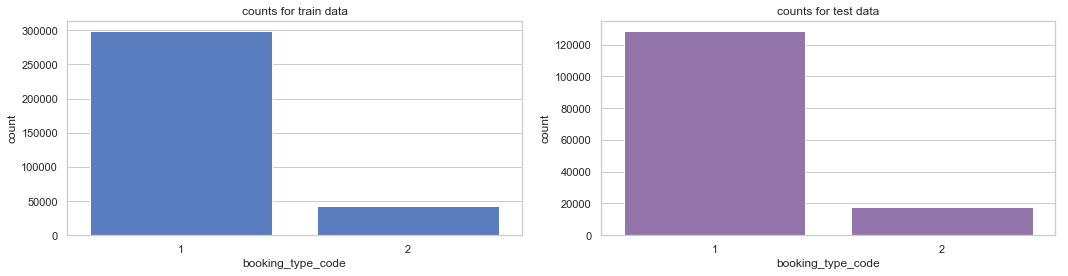

In [82]:
cat_target_plots(train_df, test_df, 'booking_type_code', target_col_name)

### `memberid` - Unique ID of the member

data type - categorical (very high cardinality)

In [83]:
print("Total unique memberid in train data: ", train_df['memberid'].nunique())
print("Total unique memberid in test data: ", test_df['memberid'].nunique())
print("number of new memberid in test data: ", len(set(test_df['memberid'].unique()) - set(train_df['memberid'].unique())))

Total unique memberid in train data:  101327
Total unique memberid in test data:  43496
number of new memberid in test data:  43496


- Maybe It's not a good idea to create any features based on memberid
- we can see that test set has all new memberids, which means train and test data is split based on memberid.
- So, in cross validation we should use group k fold.

In [84]:
train_df['memberid'].value_counts()[0:5]

81c5295dd0cd56d704882cd28c7c815658ba5796165b7d14dd39a6f4d5ee2842    50
b1ba17419ef0fe85c84ead7d792c14259cafc0c779dcd9020dd1cb5970904589    43
4b2282462a55d114c539fc2d7035507df514aadd4ad4ac9f721aee4472bcff84    39
3850b3f22326a2bbfa4a1f66bb8b97f7b7271e8e3b2e8bbee0450eb94f8d4d2e    38
c54eea7870f04d9debcf0610c215bfb289cec84313f348ac922a620ca00a38b1    36
Name: memberid, dtype: int64

In [85]:
train_df[train_df['memberid'] == '81c5295dd0cd56d704882cd28c7c815658ba5796165b7d14dd39a6f4d5ee2842']['checkin_date'].describe()

count                      50
unique                     41
top       2017-06-04 00:00:00
freq                        4
first     2016-10-13 00:00:00
last      2019-02-08 00:00:00
Name: checkin_date, dtype: object

In [86]:
show_all_pandas(train_df[train_df['memberid'] == '81c5295dd0cd56d704882cd28c7c815658ba5796165b7d14dd39a6f4d5ee2842'].head(7))

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,days_stay,how_early_book,total_people,same_state_travel
269901,e2b3d9feaf0b4ac954241aca97713d9b9c90aeccfa58af...,2016-08-27,2016-11-25,2016-11-27,1,1,18,0,45,1,1,3,14,3.0,2.0,6,4,H,1,81c5295dd0cd56d704882cd28c7c815658ba5796165b7d...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,9.628923,2,90,18,0
269902,4232ce38bcc6a74e926e9f66945e716f7f052f7de2934e...,2016-08-27,2016-11-25,2016-11-27,1,1,18,0,45,1,1,3,14,3.0,2.0,6,3,H,1,81c5295dd0cd56d704882cd28c7c815658ba5796165b7d...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,8.015932,2,90,18,0
269903,95b329622f5fa261d1c0399305b7f4ecd69ec621fae452...,2016-09-02,2016-12-30,2017-01-02,1,1,2,0,46,2,2,4,12,1.0,2.0,2,2,H,1,81c5295dd0cd56d704882cd28c7c815658ba5796165b7d...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.068796,3,119,2,1
269904,4e34332e65c77e6f2a3175ddb48e9c808c47479b207582...,2016-09-02,2016-12-30,2017-01-02,1,1,2,0,46,2,2,4,12,1.0,2.0,2,2,H,1,81c5295dd0cd56d704882cd28c7c815658ba5796165b7d...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.000179,3,119,2,1
269905,d511f2d75a4b3ec9ed1fbc0318c9bf084d9c1530abe3af...,2016-09-27,2016-10-15,2016-10-16,1,1,2,0,46,1,1,2,6,2.0,2.0,6,4,H,1,81c5295dd0cd56d704882cd28c7c815658ba5796165b7d...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,9.347748,1,18,2,0
269906,712d70914ee907b9833d699e77551f6b38445e1eb84362...,2016-09-27,2016-10-13,2016-10-16,1,1,2,0,46,1,1,3,6,2.0,2.0,6,4,H,1,81c5295dd0cd56d704882cd28c7c815658ba5796165b7d...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,8.042733,3,16,2,0
269907,a53949e8681de6737331ccc17948787f662a9e0e75badb...,2016-10-03,2016-11-01,2016-11-05,3,1,4,0,46,2,1,4,16,1.0,2.0,7,2,H,1,81c5295dd0cd56d704882cd28c7c815658ba5796165b7d...,C,A,9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e47...,8.425105,4,29,4,0


- We can see that some customers has done reservation many times for same resort on same day, and their F&B ammout is also different. Why?

### `cluster_code` - Cluster Code of Resort

data type - categorical

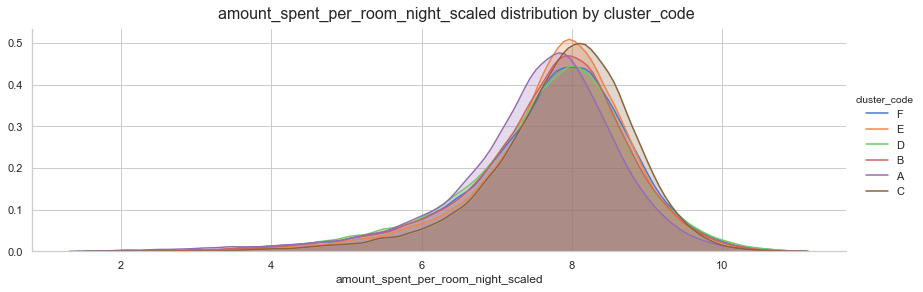

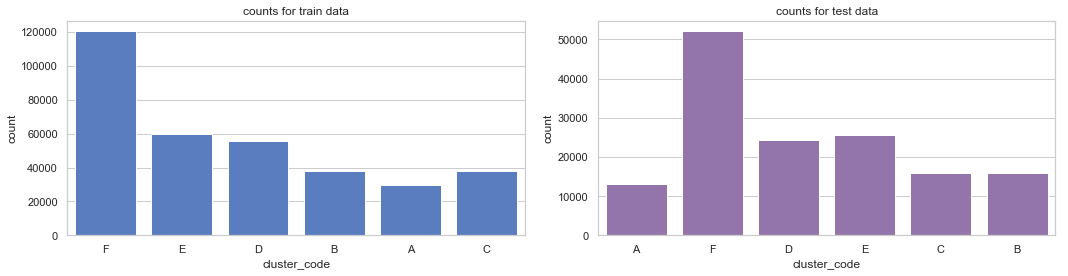

In [87]:
cat_target_plots(train_df, test_df, 'cluster_code', target_col_name)

- based on http://www.clubmahindra.com/our-resorts/ , this can be a Theme type of the resort.

### `reservationstatusid_code` - Reservation Status ID

data type - categorical

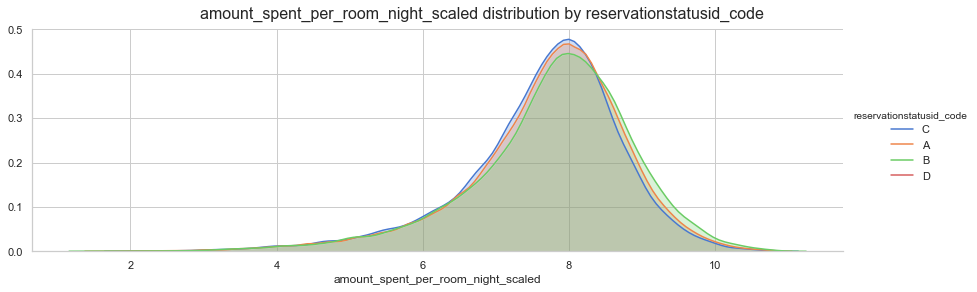

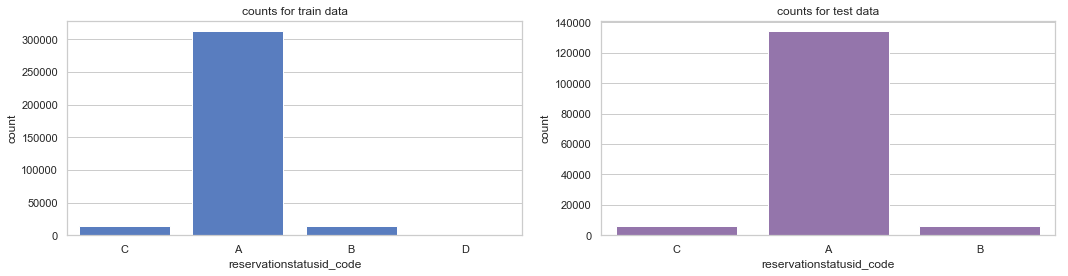

In [88]:
cat_target_plots(train_df, test_df, 'reservationstatusid_code', target_col_name)

### `resort_id` - Unique Resort ID

data type - categorical

In [89]:
print("Total unique resort_id in train data: ", train_df['resort_id'].nunique())
print("Total unique resort_id in test data: ", test_df['resort_id'].nunique())
print("number of new resort_id in test data: ", len(set(test_df['resort_id'].unique()) - set(train_df['resort_id'].unique())))

Total unique resort_id in train data:  32
Total unique resort_id in test data:  32
number of new resort_id in test data:  0


In [90]:
le = LabelEncoder()
train_df['resort_id'] = le.fit_transform(train_df['resort_id'])
test_df['resort_id'] = le.transform(test_df['resort_id'])

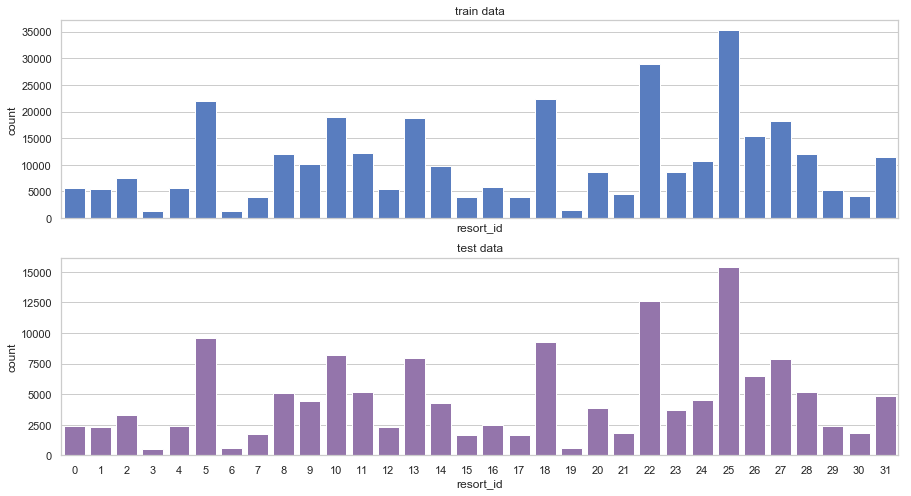

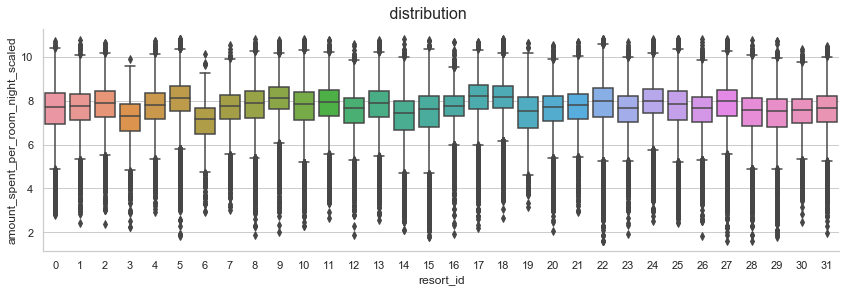

In [91]:
fig, ax = plt.subplots(nrows=2, figsize=(15,8), sharex=True)
sns.countplot(train_df['resort_id'], ax=ax[0], color=c_b)
ax[0].set(title='train data')

sns.countplot(test_df['resort_id'], ax=ax[1], color=c_p)
ax[1].set(title='test data')

facet = sns.catplot(y=target_col_name, x="resort_id", kind="box", data=train_df,  height=4, aspect=3)
facet.fig.suptitle(' distribution', fontsize=16, y=1.01)

plt.tight_layout()
plt.show()

## Saving data

In [136]:
show_all_pandas(train_df.head())

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,days_stay,how_early_book,total_people,same_state_travel,rooms,person_per_room,diff_pax_total
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,7,7.706428,1,0,2,0,1.0,3.0,1
1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,1,6.662563,5,78,2,0,1.0,2.0,0
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,9,7.871602,4,4,2,0,1.0,2.0,0
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,25,5.344943,5,40,4,0,1.0,2.0,-2
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,25,7.059346,5,103,2,0,1.0,2.0,0


In [137]:
show_all_pandas(test_df.head())

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,days_stay,how_early_book,total_people,same_state_travel,rooms,person_per_room,diff_pax_total
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,2018-04-05,2018-04-05,2018-04-06,3,2,2,0,45,3,3,4,1,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,20,1,0,2,0,1.0,3.0,1
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,2015-05-24,2015-06-23,2015-06-27,1,2,4,0,45,1,1,4,8,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,28,4,30,4,0,2.0,1.0,-2
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,2015-07-21,2015-08-07,2015-08-10,3,2,3,0,45,2,2,2,3,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,25,3,17,3,1,1.0,3.0,0
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,2015-07-31,2015-10-22,2015-10-25,1,2,3,0,45,1,1,2,3,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,5,3,83,3,0,1.0,3.0,0
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,2016-07-01,2016-10-01,2016-10-05,1,2,4,0,45,1,2,3,8,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,27,4,92,4,0,2.0,1.0,-2


In [138]:
train_df.shape

(341424, 31)

In [139]:
missing_info(train_df)

,missing values,% of missing values


In [140]:
missing_info(test_df)

,missing values,% of missing values


In [141]:
train_df.to_csv(Path(DATA_DIR)/'train1.csv', index=False)
test_df.to_csv(Path(DATA_DIR)/'test1.csv', index=False)